In [33]:
# Problem: Use morning sensor signals as features to predict whether the humidity will be high at 3pm.

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [36]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Datasets_CSV\daily_weather.csv")

In [37]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [38]:
data.columns


Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'high_humidity_3pm'],
      dtype='object')

In [39]:
data.shape

(1095, 10)

In [40]:
data.describe()


,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,0.499543
std,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,0.500228
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,0.000000
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,0.000000
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [41]:
data['high_humidity_3pm'].value_counts()

high_humidity_3pm
0    548
1    547
Name: count, dtype: int64

In [42]:
# Removing the rows which contains the null values

In [43]:
data.dropna(inplace=True)

In [44]:

data.shape

(1064, 10)

In [45]:
dependent_variable = 'high_humidity_3pm'

In [46]:
independent_variables = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [47]:
X = data[independent_variables]

In [48]:
y = data[dependent_variable]

In [49]:
# By using train_test_split we have split the data into traing dataset and testing datasets.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [51]:
# Fit on Train Set

In [52]:
humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [53]:

# Predict on Test Set

In [54]:
y_predicted = humidity_classifier.predict(X_test)

In [55]:
y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [56]:
y_test[:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_3pm, dtype: int64

In [57]:
# Measure Accuracy of the Classifier

In [58]:
accuracy_score(y_test, y_predicted) * 100

90.9090909090909

In [59]:
data.iloc[-1]

air_pressure_9am          921.530000
air_temp_9am               77.702000
avg_wind_direction_9am     97.100000
avg_wind_speed_9am          3.265932
max_wind_direction_9am    125.900000
max_wind_speed_9am          4.451511
rain_accumulation_9am       0.000000
rain_duration_9am           0.000000
relative_humidity_9am      14.560000
high_humidity_3pm           0.000000
Name: 1094, dtype: float64

In [60]:
# Visulaizing Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG 
from IPython.display import display

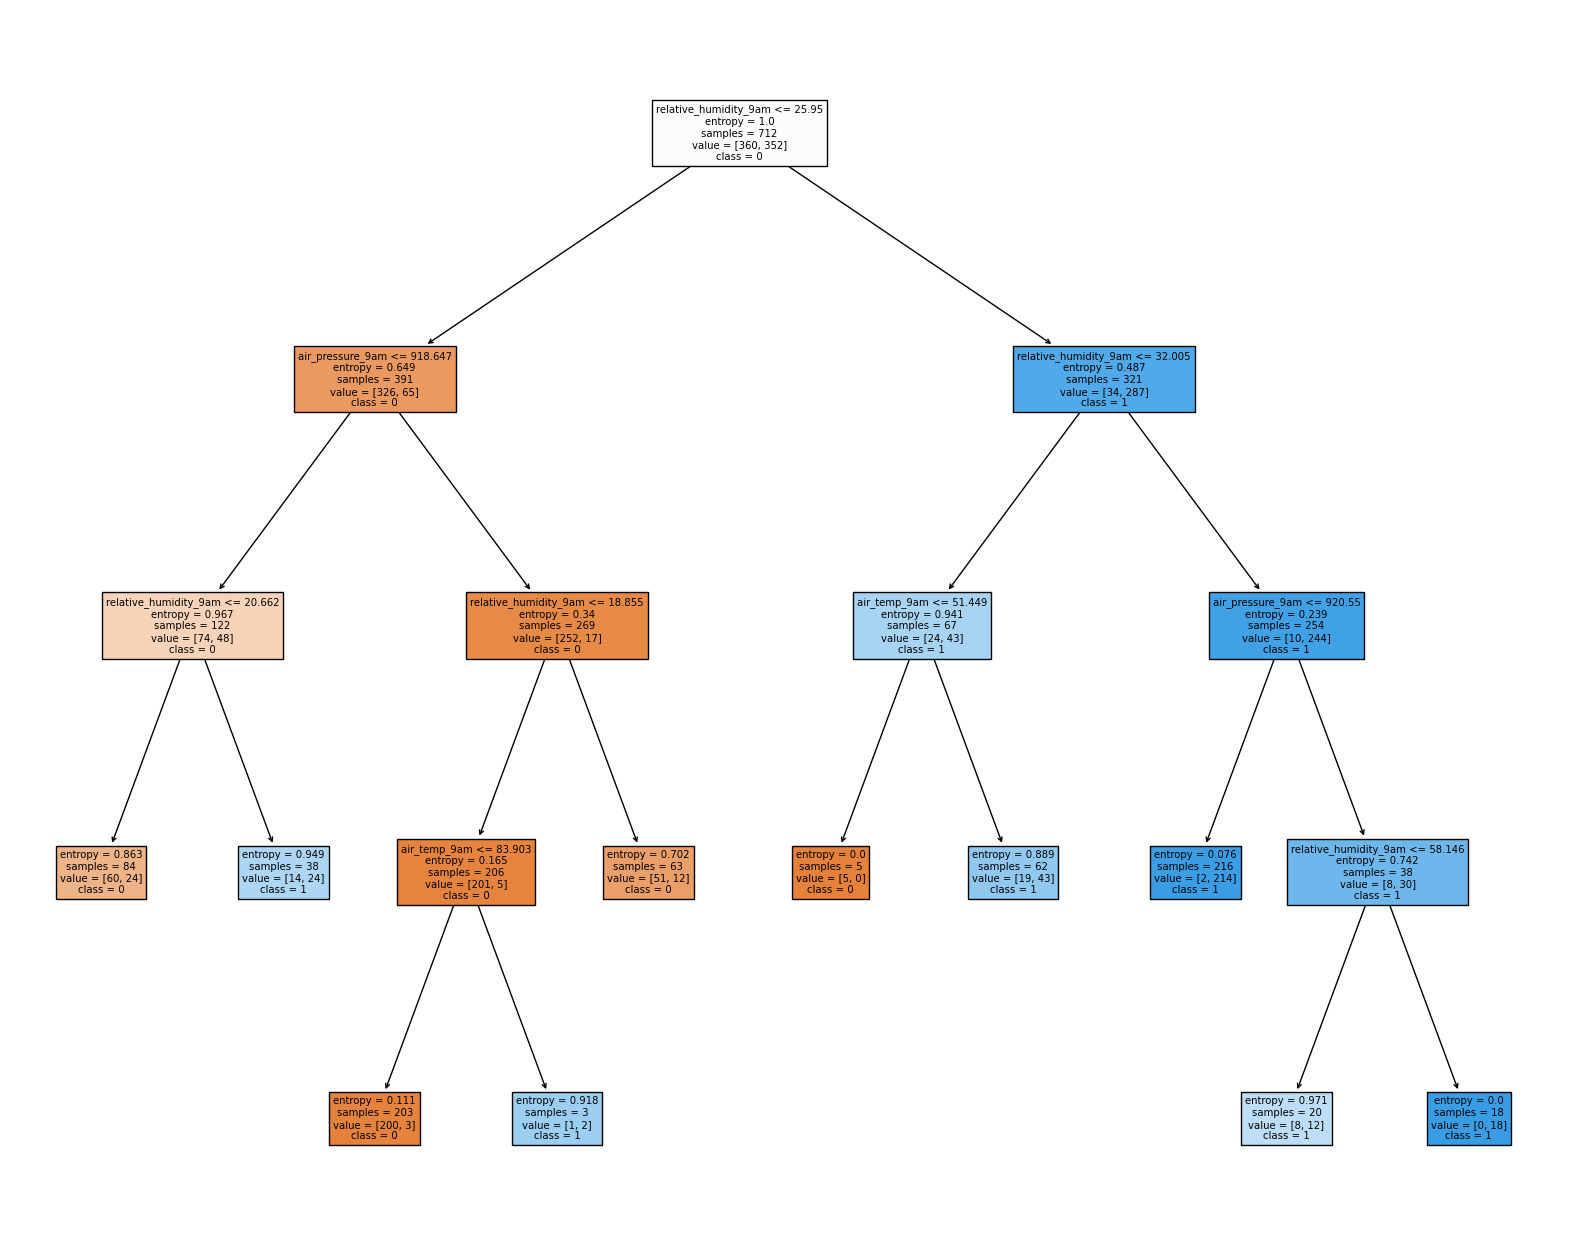

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 16))
plot_tree(humidity_classifier, feature_names=X_train.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()